In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [193]:
dados = pd.read_csv("data/ca-NE-unido.csv")

In [194]:

# Mostra o nome das colunas
print("Nomes das colunas:")
print(dados.columns)

Nomes das colunas:
Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')


In [195]:
dados['Data da Coleta'] = pd.to_datetime(dados['Data da Coleta'], format='%d/%m/%Y')
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.')
dados['Valor de Venda'] = dados['Valor de Venda'].astype(float)
#dados = dados[dados['Data da Coleta'].dt.year == 2022]
dados = dados[dados['Produto'] == 'GASOLINA']
dados = dados[dados['Municipio'] == 'FORTALEZA']
dados.set_index('Data da Coleta',inplace=True)

In [197]:
dados['Municipio'].value_counts()

Municipio
FORTALEZA    6742
Name: count, dtype: int64

<Axes: xlabel='Data da Coleta'>

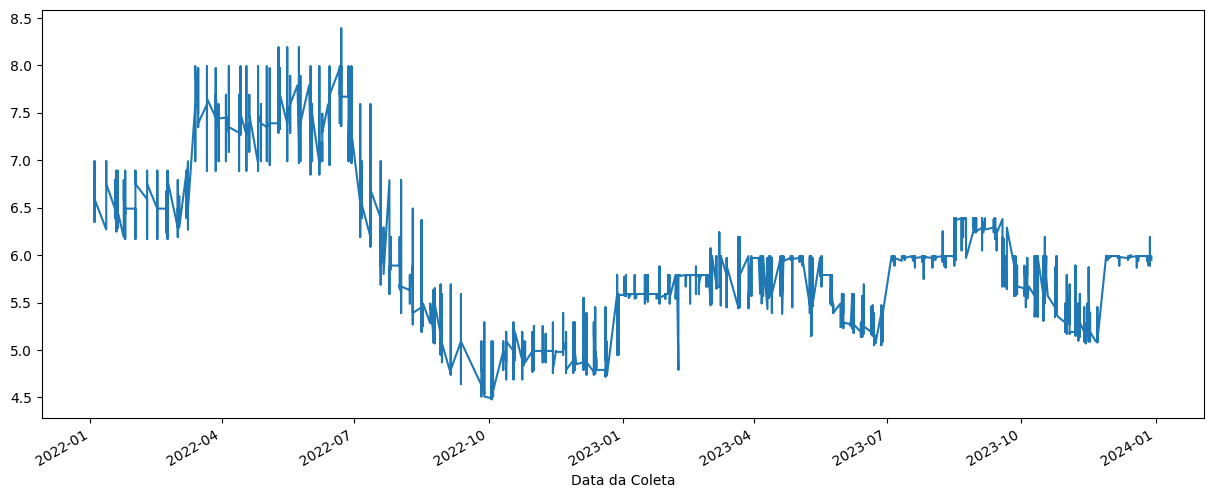

In [198]:
dados['Valor de Venda'].plot(figsize=(15,6))

<Axes: xlabel='Data da Coleta'>

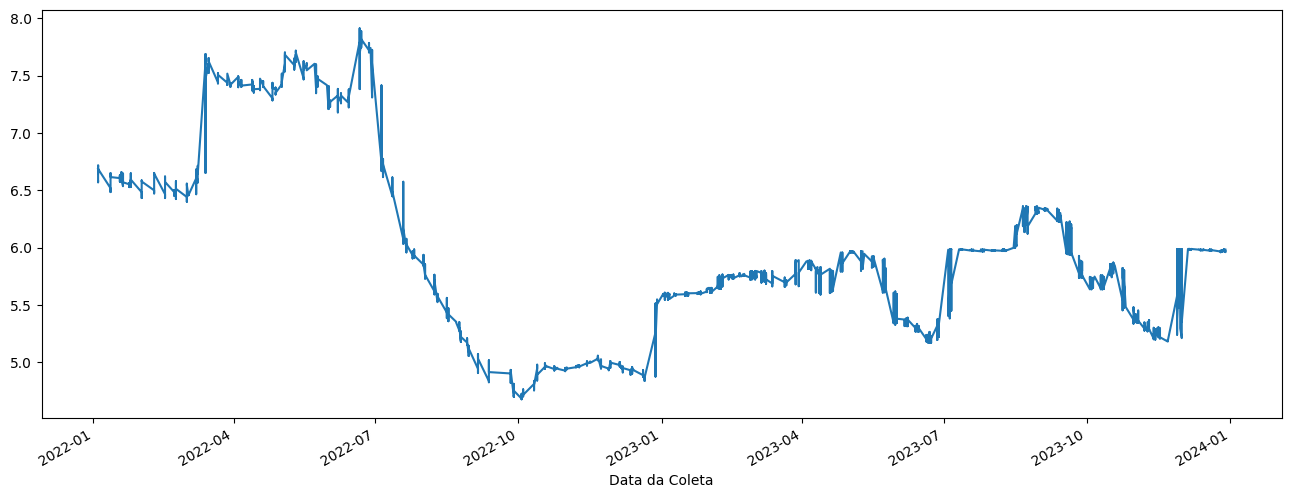

In [ ]:
# Medias moveis
df_mean = dados['Valor de Venda'].rolling(30).mean()
df_mean.plot(figsize=(16,6))

<Axes: xlabel='Data da Coleta'>

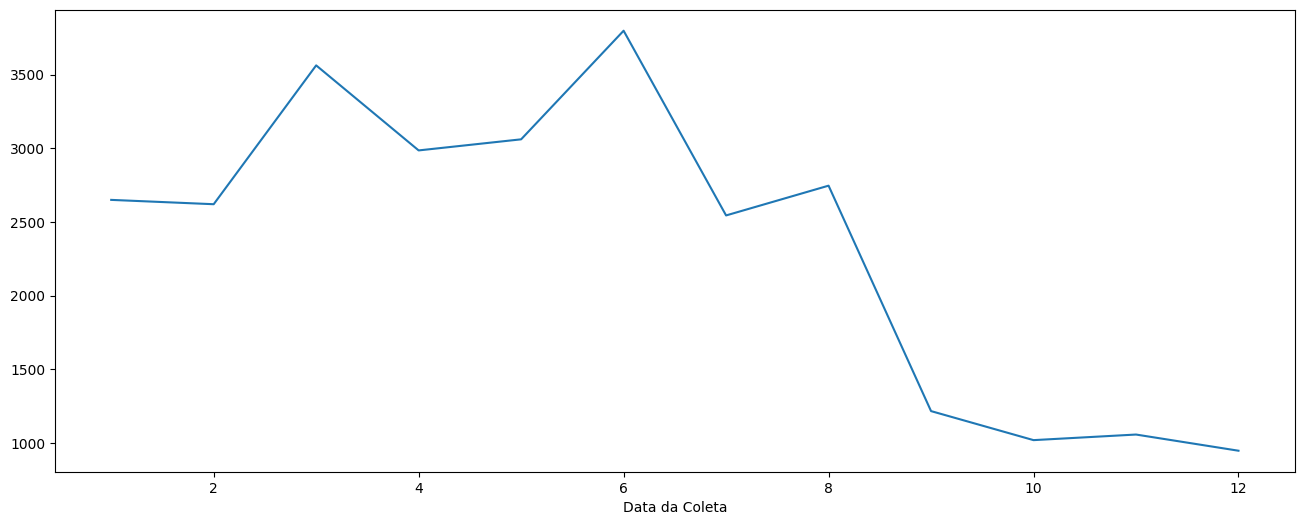

In [ ]:
# Agrupa e soma para cada mes do ano
dados_2022 = dados[dados.index.year == 2022]
dados_2022['Valor de Venda'].groupby(dados_2022.index.month).sum().plot(figsize=(16,6))

<Axes: xlabel='Data da Coleta'>

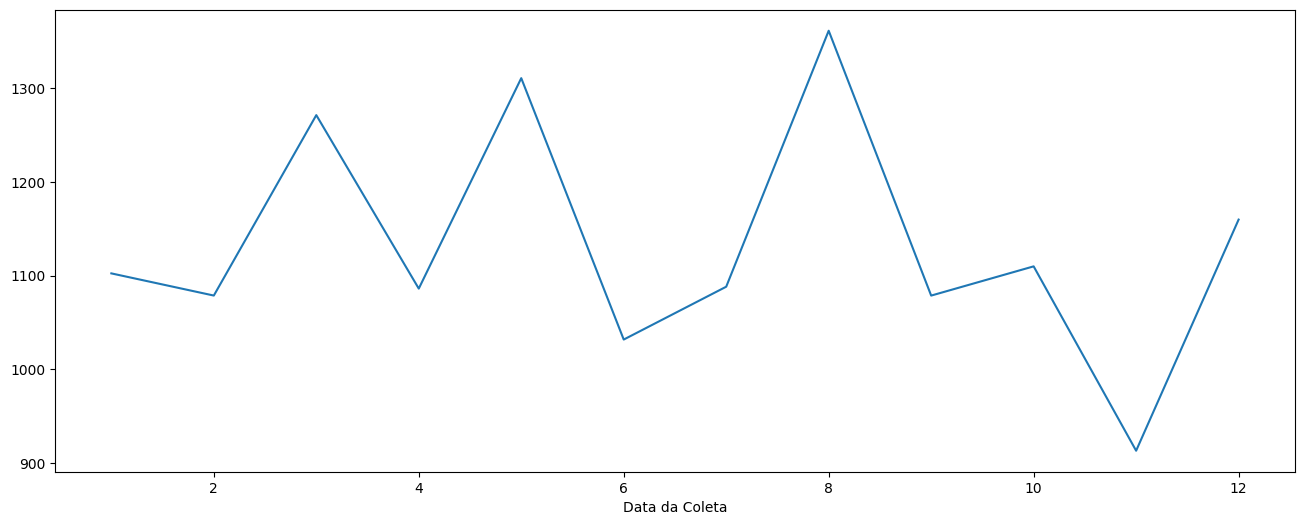

In [ ]:
# Agrupa e soma para cada mes do ano
dados_2023 = dados[dados.index.year == 2023]
dados_2023['Valor de Venda'].groupby(dados_2023.index.month).sum().plot(figsize=(16,6))

In [ ]:
#filtro = (dados.index.month >= 5 ) & (dados.index.month <= 8 )
# dados['Valor de Venda'].diff().plot(figsize=(16,6))